# Linear Regression Model

### Project assignements



1. Create a plot of time_seconds (vertical axis) versus age (horizontal axis). Is there a linear relationship between these variables?
2. Fit a linear model to predict time_seconds using the age variable
3. Use the coefficients from the linear model to plot the regression line on top of your original plot.
4. Calculate the fitted values and residuals
5. Check the normality assumption by plotting a histogram of the residuals. Are they approximately normally distributed?
6. Check the homoscedasticity assumption by plotting a the residuals against the fitted values. Is this assumption satisfied?
7. Use your model to predict the amount of time that a 40 year old person will spend on the website.
8. Fit another model that predicts time_seconds based on browser.
9. Print out the coefficients. What is the difference in average time spent on each browser?

In [11]:
# Imporitng libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
website = pd.read_csv('website.csv')

# Print the first five rows
print(website.head())

   time_seconds   age browser
0         486.0  47.1  Safari
1         645.7  64.6  Chrome
2         345.0  45.4  Safari
3         413.4  34.4  Chrome
4         426.4  31.3  Safari


## REGRESSION MODEL - QUANTITATIVE PREDICTOR

### 1. CHECKING FOR POSSIBILE LINEAR RELATIONSHIP

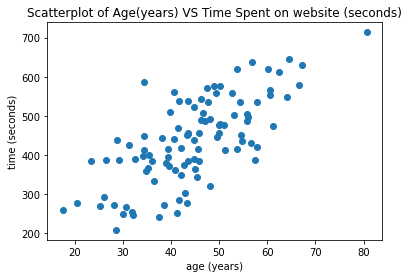

In [60]:
# Plotting age vs time_seconds to check for possibile relationship

plt.scatter(y = website.time_seconds, x = website.age)
plt.title('Scatterplot of Age(years) VS Time Spent on website (seconds)')
plt.ylabel('time (seconds)')
plt.xlabel('age (years)')
plt.show()

### 2. FIT LINEAR MODEL, PREDICT TIME_SPENT BASED ON AGE

In [40]:
# using sm.OLS.from_formula to build a model with age as predictor

model = sm.OLS.from_formula('time_seconds~age', website)
results = model.fit()

# printing parameters to find best line for linear regression
print(results.params)

y_intercept= results.params[0]
slope= results.params[1]

# we now know y value for x = 0 (y_intercept), we will use model to predict 
# the second point of the line, prediction for time spent given 90 as age

pred_90= slope * 90 + y_intercept
print('\n' + str(pred_90))


Intercept    128.967945
age            6.913758
dtype: float64

751.2061287878971


### 3. PLOT REGRESSION LINE USING COEFFICENTS FROM LINEAR MODEL

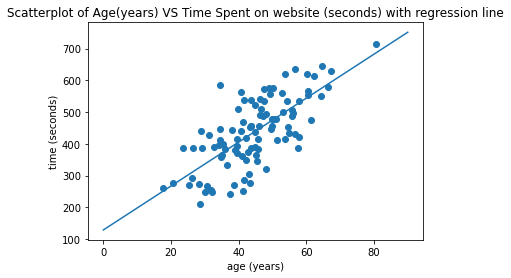

In [61]:
# we now have 2 points to plot the line on our previous scatteplot

plt.scatter(y = website.time_seconds, x = website.age)
plt.title('Scatterplot of Age(years) VS Time Spent on website (seconds) with regression line')
plt.ylabel('time (seconds)')
plt.xlabel('age (years)')
# x values for both points
x = [0, 90]
# y values for both points
y = [128.697945, 751.2061287878971 ]
plt.plot(x,y)
plt.show()

### 4. CALCULATING FITTED VALUES AND RESIDUALS AND PLOT THEM TO CHECK IF NORMALITY AND HOMOSCEDASTICITY ASSUMPTIONS ARE SATISFIED

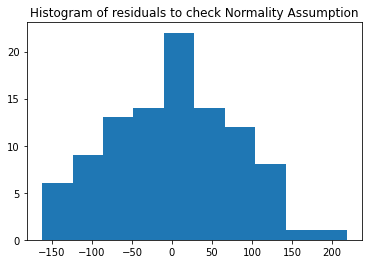

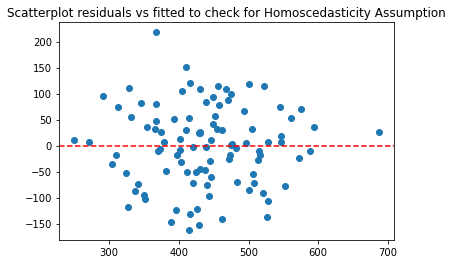

In [63]:
# Calculaitng fitted values 
fitted = results.predict(website)
# Calculaitng residuals
residuals = website.time_seconds - fitted
# Plotting residuals to check Normality assumption
plt.title('Histogram of residuals to check Normality Assumption')

plt.hist(residuals)
plt.show()
plt.clf()

# Plotting residuals vs fitted to check for Homoscedasticity Assumption
plt.title('Scatterplot residuals vs fitted to check for Homoscedasticity Assumption')

plt.scatter(fitted, residuals)
plt.axhline(y=0, color='r', linestyle='dashed')

plt.show()



Residuals are normally distributed, the Normality Assumption is satisfied.

Fitted VS Residuals are widely distributed and centered at 0, so Homoscedasticity Assumption is satisfied too.


In [41]:
# Predicting time spent on the website for a 40 years old man
pred_40= slope * 40 + y_intercept
print(pred_40)

405.5182489324498


## REGRESSION MODEL - BINARY CATEGORICAL PREDICTOR

In [58]:
# Building a model to predict time spent based on browser

model2= sm.OLS.from_formula('time_seconds ~ browser', website)
results2 = model2.fit()
print(results2.params)


Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64
489.70425531914907 390.64716981132074


In [64]:

# Calculating time_spent mean for each browswer

chrome_mean = np.mean(website.time_seconds[website.browser == 'Chrome'])
safari_mean = np.mean(website.time_seconds[website.browser == 'Safari'])

print(chrome_mean, safari_mean)

489.70425531914907 390.64716981132074


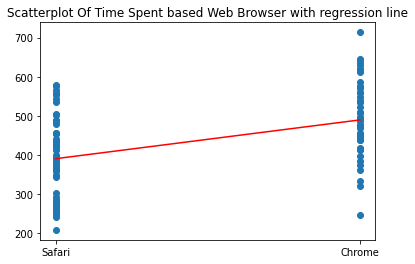

In [65]:

plt.scatter(website.browser, website.time_seconds)
plt.title('Scatterplot Of Time Spent based Web Browser with regression line')
plt.plot([0,1], [safari_mean, chrome_mean], color = 'r')
plt.show()